In [2]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import skimage.io
import skimage
import cv2
import tifffile as tiff 
import numpy as np
import tifffile as tiff
import xmltodict as xd, numpy as np, pickle
from collections import defaultdict
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']=300
import seaborn as sns
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt

def fit_spline(pts):
    try:
        okay = np.where(np.abs(np.diff(pts,axis=0)).sum(1) > 0)[0]
        pts = np.vstack([pts[okay], pts[-1]])#, pts[0]

        tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
        u_new = np.linspace(u.min(), u.max(), 1000)
        x_new, y_new = splev(u_new, tck, der=0)
        pts=np.vstack((x_new, y_new)).T
    except:
        pass
    return pts


def gen_contour_df(xml,compression=1,include_labels=[]):
    with open(xml,"rb") as f:
            d=xd.parse(f)

    cells=[]
    cell_dot=[]
    lbls=[]
    for i,annotation in enumerate(d['ASAP_Annotations']["Annotations"]["Annotation"]):
        try:
            lbl=annotation["@PartOfGroup"]
            contour=np.array([(float(coord["@X"]),float(coord["@Y"])) for coord in annotation["Coordinates"]["Coordinate"]])
            cells.append(contour)
            lbls.append(lbl)
        except:
            print(xml,i)

    contour_df=pd.DataFrame(cells,columns=['contours'])
    contour_df['contours']=contour_df['contours'].map(lambda x:x/compression)
    contour_df['xmin']=contour_df['contours'].map(lambda x: x[:,0].min())
    contour_df['xmax']=contour_df['contours'].map(lambda x: x[:,0].max())
    contour_df['ymin']=contour_df['contours'].map(lambda x: x[:,1].min())
    contour_df['ymax']=contour_df['contours'].map(lambda x: x[:,1].max())
    contour_df['xmean']=contour_df['contours'].map(lambda x: x[:,0].mean())
    contour_df['ymean']=contour_df['contours'].map(lambda x: x[:,1].mean())
    contour_df['lbl']=[lbl.lower() for lbl in lbls] # .split()[0]
    contour_df.loc[:,'contours']=contour_df['contours'].map(fit_spline)
    if include_labels:
        contour_df=contour_df[contour_df['lbl'].isin(include_labels)]

    return contour_df

In [1]:
! ls new_skin_layers/Skin_Layer_XML/

108_A1c_ASAP.xml  36_B2e_ASAP.xml   44_A1c_ASAP.xml  66_A1b_ASAP.xml
108_A1d_ASAP.xml  37_A1c_ASAP.xml   46_A2b_ASAP.xml  78_A2d_ASAP.xml
125_A2b_ASAP.xml  37_A2d_ASAP.xml   47_A1c_ASAP.xml  85_A1b_ASAP.xml
125_A2d_ASAP.xml  37_A2eX_ASAP.xml  53_A1b_ASAP.xml  90_A2b_ASAP.xml
153_A1d_ASAP.xml  3_A2b_ASAP.xml    5_A1d_ASAP.xml   91_A2b_ASAP.xml
15_A1a_ASAP.xml   3_A2c_ASAP.xml    5_A1eX_ASAP.xml  9_A7b_ASAP.xml
20_B1c_ASAP.xml   41_A2b_ASAP.xml   60_A1c_ASAP.xml
20_B1d_ASAP.xml   43_A2b_ASAP.xml   60_A1d_ASAP.xml


In [13]:
import glob,os
annots=dict()
annots['tumor']={os.path.basename(f).replace("_ASAP","").replace(".xml",""):gen_contour_df(f) for f in glob.glob(f"new_test_slides/XML/*_ASAP.xml")}
annots['macro']={os.path.basename(f).replace("_ASAP","").replace(".xml",""):gen_contour_df(f) for f in glob.glob("new_skin_layers/Skin_Layer_XML/*.xml")}



/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][8]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][8]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][40]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][40]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.loca

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][50]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][50]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][52]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][52]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][45]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][77]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: Runtime

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][82]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][82]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][5]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][5]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][158]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][158]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: Runtime

new_test_slides/XML/201_A1a_ASAP.xml 9
new_test_slides/XML/201_A1a_ASAP.xml 10
new_test_slides/XML/201_A1a_ASAP.xml 11
new_test_slides/XML/201_A1a_ASAP.xml 12
new_test_slides/XML/201_A1a_ASAP.xml 13
new_test_slides/XML/201_A1a_ASAP.xml 14
new_test_slides/XML/201_A1a_ASAP.xml 15
new_test_slides/XML/201_A1a_ASAP.xml 16
new_test_slides/XML/201_A1a_ASAP.xml 17
new_test_slides/XML/201_A1a_ASAP.xml 18
new_test_slides/XML/201_A1a_ASAP.xml 19
new_test_slides/XML/201_A1a_ASAP.xml 20
new_test_slides/XML/201_A1a_ASAP.xml 21
new_test_slides/XML/201_A1a_ASAP.xml 22
new_test_slides/XML/201_A1a_ASAP.xml 23
new_test_slides/XML/201_A1a_ASAP.xml 24
new_test_slides/XML/201_A1a_ASAP.xml 25
new_test_slides/XML/201_A1a_ASAP.xml 26
new_test_slides/XML/201_A1a_ASAP.xml 27
new_test_slides/XML/201_A1a_ASAP.xml 28
new_test_slides/XML/201_A1a_ASAP.xml 29
new_test_slides/XML/201_A1a_ASAP.xml 30
new_test_slides/XML/201_A1a_ASAP.xml 31
new_test_slides/XML/201_A1a_ASAP.xml 32
new_test_slides/XML/201_A1a_ASAP.xml 33
n

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][3]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][3]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][75]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][75]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][97]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][97]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWa

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][147]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][147]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][140]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][140]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][124]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][124]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: R

new_test_slides/XML/41_A2c_ASAP.xml 0
new_test_slides/XML/41_A2c_ASAP.xml 1
new_test_slides/XML/41_A2c_ASAP.xml 2
new_test_slides/XML/41_A2c_ASAP.xml 3
new_test_slides/XML/41_A2c_ASAP.xml 4
new_test_slides/XML/41_A2c_ASAP.xml 5
new_test_slides/XML/41_A2c_ASAP.xml 6
new_test_slides/XML/41_A2c_ASAP.xml 7
new_test_slides/XML/41_A2c_ASAP.xml 8
new_test_slides/XML/41_A2c_ASAP.xml 9
new_test_slides/XML/41_A2c_ASAP.xml 10
new_test_slides/XML/41_A2c_ASAP.xml 11
new_test_slides/XML/41_A2c_ASAP.xml 12
new_test_slides/XML/41_A2c_ASAP.xml 13
new_test_slides/XML/41_A2c_ASAP.xml 27
new_test_slides/XML/41_A2c_ASAP.xml 28
new_test_slides/XML/41_A2c_ASAP.xml 29
new_test_slides/XML/41_A2c_ASAP.xml 30
new_test_slides/XML/41_A2c_ASAP.xml 31
new_test_slides/XML/41_A2c_ASAP.xml 32
new_test_slides/XML/41_A2c_ASAP.xml 33
new_test_slides/XML/41_A2c_ASAP.xml 34
new_test_slides/XML/41_A2c_ASAP.xml 35
new_test_slides/XML/41_A2c_ASAP.xml 36
new_test_slides/XML/41_A2c_ASAP.xml 37
new_test_slides/XML/41_A2c_ASAP.xml

new_test_slides/XML/41_A2c_ASAP.xml 2760
new_test_slides/XML/41_A2c_ASAP.xml 2761
new_test_slides/XML/41_A2c_ASAP.xml 2762
new_test_slides/XML/41_A2c_ASAP.xml 2763
new_test_slides/XML/41_A2c_ASAP.xml 2768
new_test_slides/XML/41_A2c_ASAP.xml 2818
new_test_slides/XML/41_A2c_ASAP.xml 2853
new_test_slides/XML/41_A2c_ASAP.xml 2864
new_test_slides/XML/41_A2c_ASAP.xml 2865
new_test_slides/XML/41_A2c_ASAP.xml 2868
new_test_slides/XML/41_A2c_ASAP.xml 2869
new_test_slides/XML/41_A2c_ASAP.xml 2870
new_test_slides/XML/41_A2c_ASAP.xml 2871
new_test_slides/XML/41_A2c_ASAP.xml 2872
new_test_slides/XML/41_A2c_ASAP.xml 2873
new_test_slides/XML/41_A2c_ASAP.xml 2874
new_test_slides/XML/41_A2c_ASAP.xml 2875
new_test_slides/XML/41_A2c_ASAP.xml 2876
new_test_slides/XML/41_A2c_ASAP.xml 2877
new_test_slides/XML/41_A2c_ASAP.xml 2878
new_test_slides/XML/41_A2c_ASAP.xml 2879
new_test_slides/XML/41_A2c_ASAP.xml 2880
new_test_slides/XML/41_A2c_ASAP.xml 2881
new_test_slides/XML/41_A2c_ASAP.xml 2882
new_test_slides/

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][209]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][209]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][170]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][170]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[0][245]=x[0][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning:

Setting x[1][245]=x[1][0]

/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: R

In [14]:
# annots['tumor']['3_A2d']=annots['tumor']['242125_3 A2d']
# annots['tumor']['264_A1a']=annots['tumor']['264 edited_A1']

#del annots['tumor']['41_A2c'], annots['tumor']['201_A1a']
del annots['tumor']['264 edited_A1']#, annots['macro']['125_A2d']#annots['tumor']['242125_3 A2d'],

In [4]:
len(annots['macro'].keys())

29

In [7]:
! ls new_test_slides/XML/212*

ls: cannot access 'new_test_slides/XML/212*': No such file or directory


In [15]:
for k in annots:
    for k2 in annots[k]:
        annots[k][k2]['ID']=k2

In [43]:
df_annot=dict(tumor=[],macro=[])
for k in df_annot:
    df_annot[k]=pd.concat(list(annots[k].values()))

In [7]:
df_annot['tumor']['lbl'].unique()

array(['bcc', 'blue ink', 'red ink', 'inflammation', 'hair follicle',
       'complete', 'eccrine gland', 'cartilage', 'incomplete',
       'area of incomplete', 'floater', 'none', 'benign',
       'tumor free section', 'subcutaneous tissue', 'epidermis', 'dermis',
       'hair follcile', 'sebaceous gland', 'nevus', 'nerve',
       'inflamation', 'dermal nevus'], dtype=object)

In [44]:
df_annot['macro']['lbl'].unique()

array(['subcutaneous tissue', 'dermis', 'epidermis', 'hole', 'incomplete',
       'complete', 'tumor free section', 'lentigo', 'bcc',
       'eccrine gland', 'hair follicle', 'inflammation', 'scc',
       'incomplete ', 'complete '], dtype=object)

In [45]:
df_annot['macro']=df_annot['macro'][df_annot['macro']['lbl'].isin(['dermis', 'epidermis',
                                        'subcutaneous tissue','hole'
                                       ])]#.unique()

In [46]:
df={}
for k in df_annot:
    df[k]={os.path.basename(f).replace('.pkl','') : pd.read_pickle(f) for f in (glob.glob(f"{'updated_patch_info' if k!='macro' else 'updated_patch_info_skin_layers'}/{k}/*.pkl")  )}
    for k2 in df[k]:
        df[k][k2]['ID']==k2
    df[k]=pd.concat(list(df[k].values()))

In [22]:
df['macro']['ID'].nunique()

30

In [21]:
# overwrite any missing patch information from macro arcthitecture
# ! for k in tumor macro ; do ln patch_info/${k}/*.pkl updated_patch_info/${k}/; done #df['tumor']['ID'].nunique()
# ! ls updated_patch_info/macro/ | wc

In [22]:
! free -g

              total        used        free      shared  buff/cache   available
Mem:            565          36         464           0          64         527
Swap:           119           0         118


In [48]:
import numpy as np
from pathflowai.utils import generate_tissue_mask
from skimage import draw
import tifffile
import numpy as np
import cv2
compression=8
patch_size=256

def get_dff(k, k2='macro'):
    try:
        arr=cv2.resize(tifffile.imread(f"new_test_slides/ASAP_Tiff/{k}_ASAP.tif") if k2!='macro' else tifffile.imread(f"new_skin_layers/Skin_Layer_ASAP_TIFF/{k}_ASAP.tif"),None,fx=1/compression,fy=1/compression)#np.load(f"./inputs/{k}.npy")np.load(f"./inputs/{k}.npy")
        if k2=='macro':
            mask=generate_tissue_mask(arr,compression=compression/2,threshold=230, keep_holes=False, max_hole_size=200, kernel=5)
            mask2=generate_tissue_mask(arr,compression=compression/2,threshold=230, keep_holes=False, max_hole_size=200000, kernel=5)
            mask3=mask2^mask
        dff=df[k2][df[k2]['ID']==k]
        if k2=='macro': dff['hole_computed']=[mask3[x:x+int(patch_size/compression),y:y+int(patch_size/compression)].astype(float).mean() for x,y in (dff[['x','y']].values/compression).astype(int).tolist()]
        for name, annots_ in annots[k2][k].groupby('lbl'):
            annots_=cv2.fillPoly(np.zeros(arr.shape[:2]), pts=annots_['contours'].map(lambda x:(x/compression).astype(int)).tolist(), color=1)
            dff[name]=[annots_[x:x+int(patch_size/compression),y:y+int(patch_size/compression)].astype(float).mean() for x,y in (dff[['x','y']].values/compression).astype(int).tolist()]
    #     tissue_types=['epidermis','dermis','subcutaneous tissue','hole']
    #     for k in tissue_types:
    #         if k not in dff.columns: dff[k]=0.
    #     dff.loc[dff[tissue_types].sum(1)==0,'annotation']='unassigned'
    #     for k in tissue_types:
    #         dff.loc[dff[k]>0.0,'annotation']=k
        if k2=='macro': del mask, mask2, mask3
        del arr
    except Exception as e:
        print(k,k2,e)
        dff=[]
    return dff

In [36]:
len(annots['tumor'].keys()),len(annots['macro'].keys())

(119, 29)

In [51]:
# ! mkdir updated_model_patch_annotations

In [52]:
df['tumor']['ID']

1569     51_A1c
1570     51_A1c
1571     51_A1c
1821     51_A1c
1822     51_A1c
          ...  
28805    26_A2a
28806    26_A2a
28807    26_A2a
29055    26_A2a
29056    26_A2a
Name: ID, Length: 1514376, dtype: object

In [53]:
annots['tumor'].keys()

dict_keys(['140_A1b', '291_A1c', '202_B1', '107_A1c', '146_A1c', '105_A1b', '293_A1', '107_A1b', '163_A1a', '321_A1a', '137_A2e', '75_A1a', '48_A1b', '15_A1a', '51_A1c', '302_A1a', '102_A1d', '151_A1c', '100_A1b', '51_C1a', '100_B1a', '189_A1a', '135_A1d', '100_A1a', '75_A1c', '9_A7b', '75_A1b', '264_A1', '125_A2b', '117_A1a', '163_B1b', '88_A1a', '219_A1b', '28_A2a', '97_A1a', '163_A1b', '117_A1c', '120_A1a', '48_A2d', '282_A1a', '326_A1b', '146_A1d', '51_A1d', '171_A1a', '26_A1b', '19_A1a', '67_A1a', '219_A1a', '163_A1c', '11_A1c', '95_A1f', '307_A1', '95_A1b', '140_A1c', '51_B1a', '118_A1b', '51_A1a', '102_A1b', '297_A1b', '322_A2a', '65_A1b', '120_A1b', '322_B2a', '190_A1b', '322_B1a', '326_A1a', '151_A1eX', '95_A2e', '26_A2a', '95_A1g', '104_A1a', '41_A2b', '125_A2c', '153_A1c', '49_A1b', '158_A1a', '108_A1d', '316_A1c', '234_A1a', '119_A1a', '201_A1b', '286_B1b', '173_A1a', '100_B1b', '134_A1a', '178_A1a', '117_A1b', '329_A1b', '86_A1a', '71_A1', '120_B1b', '317_A1a', '100_C1a', 

In [43]:
df[k]['ID'].nunique()

121

In [42]:
set(annots[k].keys())

{'108_A1c',
 '108_A1d',
 '121_B1b',
 '125_A2b',
 '153_A1d',
 '15_A1a',
 '20_B1c',
 '20_B1d',
 '36_B2e',
 '37_A1c',
 '37_A2d',
 '37_A2eX',
 '3_A2b',
 '3_A2c',
 '41_A2b',
 '44_A1c',
 '46_A2b',
 '47_A1c',
 '53_A1b',
 '5_A1d',
 '5_A1eX',
 '60_A1c',
 '60_A1d',
 '66_A1b',
 '78_A2d',
 '85_A1b',
 '90_A2b',
 '91_A2b',
 '9_A7b'}

In [26]:
# df_update['tumor']
# df_update=pickle.load(open('model_patch_annotations/prelim_update.pkl','rb'))

In [49]:
import pickle, tqdm
for k in ['macro']:
    IDs=set(annots[k].keys()).intersection(set(df[k]['ID'].unique()))
#     print(IDs)
    df_update[k]=pd.concat([x for x in [get_dff(ID,k) for ID in tqdm.tqdm(IDs)] if x is not []])
pickle.dump(df_update,open('updated_model_patch_annotations/prelim_update.pkl','wb'))
# df_update={}
# for k in ['tumor','macro']:
#     IDs=set(annots[k].keys()).intersection(set(df[k]['ID'].unique()))
#     df_update[k]=pd.concat([x for x in [get_dff(ID,k) for ID in IDs] if x is not []])
# pickle.dump(df_update,open('updated_model_patch_annotations/prelim_update.pkl','wb'))

  0%|          | 0/30 [00:00<?, ?it/s]/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 30/30 [04:02<00:00,  8.09s/it]


In [3]:
import pickle
df_update=pickle.load(open('updated_model_patch_annotations/prelim_update.pkl','rb'))

In [39]:
# CNN vs GNN annotations; FIX!!!!!!

In [30]:
df_update['macro']['ID'].nunique()

30

In [4]:
df_tumor=df_update['tumor'][['ID', 'x', 'y', 'patch_size', 'annotation', 'bcc','inflammation','inflamation']].fillna(0)
df_tumor['inflammation']+=df_tumor['inflamation']
df_tumor=df_tumor.drop(columns=['inflamation'])

In [5]:
df_tumor['annotation']='benign'
for k in ['inflammation','bcc']:
    df_tumor.loc[df_tumor[k]>0.,'annotation']=k

In [57]:
df_update['macro'].columns

Index(['ID', 'x', 'y', 'patch_size', 'annotation', 'hole_computed', 'dermis',
       'epidermis', 'hole', 'incomplete', 'scc', 'subcutaneous tissue',
       'complete', 'tumor free section', 'lentigo', 'inflammation',
       'complete ', 'incomplete ', 'bcc', 'eccrine gland', 'hair follicle'],
      dtype='object')

In [63]:
df_macro=df_update['macro'].copy()
# tissue_types=['dermis','hole','subcutaneous tissue','epidermis']
tissue_types=['dermis','hole_computed','subcutaneous tissue','epidermis','hole']
for k in tissue_types:
    if k not in df_macro.columns: df_macro[k]=0.
df_macro.loc[df_macro[tissue_types].sum(1)==0,'annotation']='unassigned'
for k in tissue_types:
    df_macro.loc[df_macro[k]>(0.0 if k!= "hole" else 0.5),'annotation']=k
df_macro.loc[df_macro['annotation'].isin(["0","hole_computed"]),"annotation"]="unassigned"
# tissue_types.remove('hole_computed')
df_macro=df_macro[['ID', 'x', 'y', 'patch_size', 'annotation']+tissue_types]
# change this scheme in the future!! whispy derm (eg. hole in derm unannoted -> unassigned for CNN; then to derm annotation in gnn)

In [64]:
df_macro.iloc[:,-5:].sum(0)

dermis                 201679.799805
hole_computed           20089.102539
subcutaneous tissue     86746.432617
epidermis               11405.736328
hole                     6153.010742
dtype: float64

In [65]:
pd.crosstab(df_macro['ID'],df_macro['annotation'])

annotation,dermis,epidermis,hole,subcutaneous tissue,unassigned
ID,,,,,
108_A1c,12693,1247,364,837,3664
108_A1d,9388,1289,232,545,4787
125_A2b,5729,812,480,2344,2593
125_A2d,2884,446,355,1364,1473
153_A1d,6681,1163,394,511,1422
15_A1a,4045,787,303,1138,2033
20_B1c,9140,0,49,1053,2193
20_B1d,9223,879,188,1248,2409
36_B2e,1535,177,0,3441,547


/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, '20_B1c')

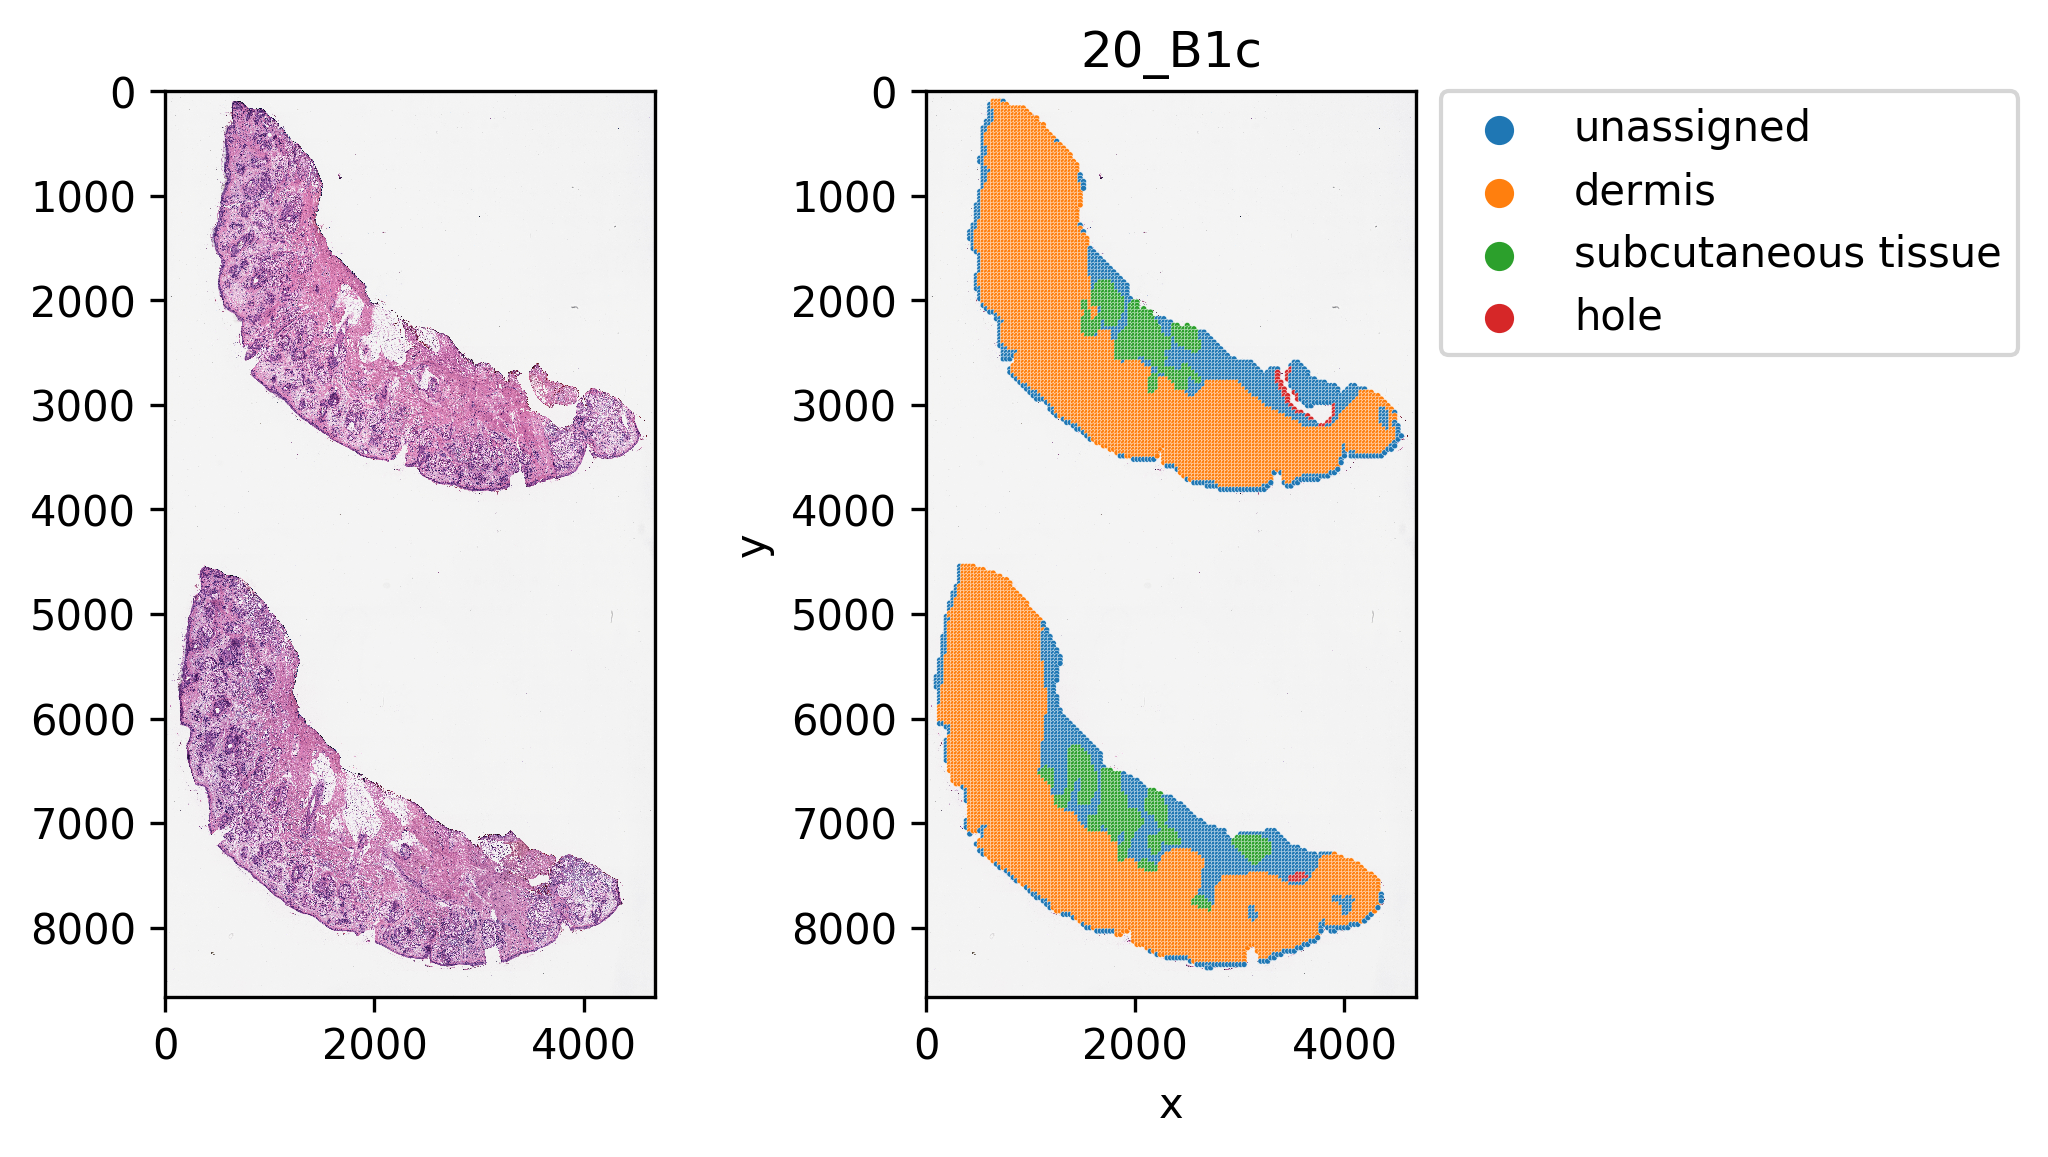

In [67]:
import cv2, numpy as np, seaborn as sns, matplotlib, matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']=300
k="20_B1c"
arr=cv2.resize(tifffile.imread(f"new_skin_layers/Skin_Layer_ASAP_TIFF/{k}_ASAP.tif"),None,fx=1/8,fy=1/8)#np.load(f"inputs/{k}.npy")
df_anno=df_macro.copy()
plt.subplot(121)
plt.imshow(np.transpose(arr,(1,0,2)))
plt.subplot(122)
plt.imshow(np.transpose(arr,(1,0,2)))
import seaborn as sns
# for name,dff in val_data['patch_info'].groupby('ID'):#
dff=df_anno[df_anno['ID']==k]
# plt.figure()
dff[['x','y']]=dff[['y','x']].iloc[:,::-1]/8
sns.scatterplot(x='x',y='y',hue='annotation',data=dff,s=2.,alpha=1)#"hole"
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(k)
# tissue mask blurring removing some obvious holes

In [3]:
# ! mkdir old_slides && mv new_test_slides/'ASAP Tiff'/'264 edited_A1_ASAP.tif' old_slides

In [4]:
# ! mv "new_test_slides/ASAP Tiff" "new_test_slides/ASAP_Tiff"

In [ ]:
import tifffile
im=tifffile.imread("new_test_slides/ASAP_Tiff/100_A1b_ASAP.tif")
# ! ls new_test_slides/* -lah 

In [ ]:
! realpath ../../cgat/inputs/


In [ ]:
im.shape

In [ ]:
import numpy as np
np.load("inputs/100_A1b.npy").shape

In [44]:
! mkdir updated_model_patch_annotations

mkdir: cannot create directory 'updated_model_patch_annotations': File exists


In [68]:
df_macro=df_macro.loc[df_macro['ID']!='20_B1c']
df_macro.to_pickle("updated_model_patch_annotations/macro_annot.pkl")

In [69]:
df_tumor.to_pickle("updated_model_patch_annotations/tumor_annot.pkl")

In [ ]:
# for GNN

In [6]:
df_macro=df_update['macro'].copy()
# tissue_types=['dermis','hole','subcutaneous tissue','epidermis']
tissue_types=['dermis','subcutaneous tissue','epidermis','hole']
for k in tissue_types:
    if k not in df_macro.columns: df_macro[k]=0.
df_macro.loc[df_macro[tissue_types].sum(1)==0,'annotation']='unassigned'
for k in tissue_types:
    df_macro.loc[df_macro[k]>(0.0 if k!= "hole" else 0.5),'annotation']=k
df_macro.loc[df_macro['annotation'].isin(["0","hole_computed"]),"annotation"]="unassigned"
# tissue_types.remove('hole_computed')
df_macro=df_macro[['ID', 'x', 'y', 'patch_size', 'annotation']+tissue_types]
df_macro=df_macro.loc[df_macro['ID']!='20_B1c']

df_macro.to_pickle("updated_model_patch_annotations/macro_annot_gnn_annot.pkl")

In [7]:
df_tumor.to_pickle("updated_model_patch_annotations/tumor_annot_gnn_annot.pkl")

In [ ]:
df_macro['annotation'].value_counts()

In [ ]:
df_macro['ID'].nunique()

In [ ]:
df_tumor['ID'].nunique()

In [ ]:
import seaborn as sns
sns.scatterplot(x='x',y='y',hue='annotation',data=df_macro[df_macro['ID']==df_macro['ID'].unique()[7]],s=1)

In [ ]:
sns.scatterplot(x='x',y='y',hue='annotation',data=df_tumor[df_tumor['ID']==df_tumor['ID'].unique()[15]],s=1)

In [ ]:
# remove cases with significant amount unassigned; indicates faulty xml ^^